In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df = pd.read_excel('resultat_DPO_summarization.xlsx')
df.head(10)

,Temperature,Win rate,Avg KL,Time spent
0,0.25,0.50,0.3809,55
1,0.00,NaN,NaN,NaN
2,1.00,0.48,0.0140,57
3,0.75,0.48,1.0331,48 min
4,0.25,0.54,1.0280,58 min
5,0.75,0.40,0.3830,1h10


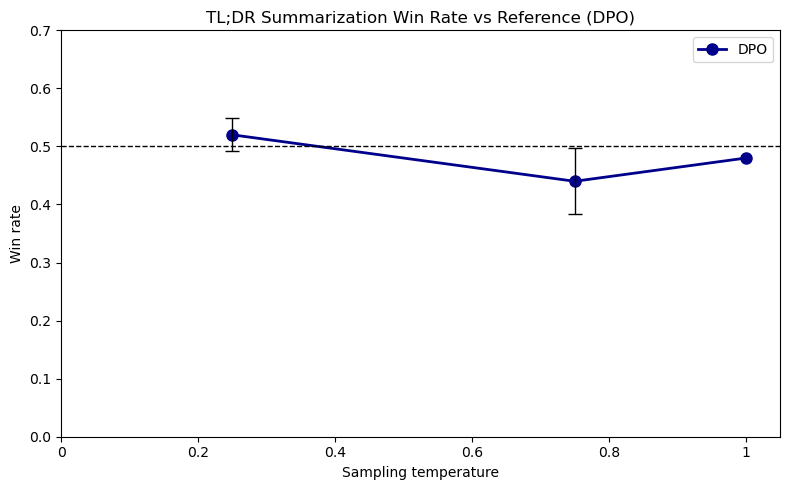

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import StrMethodFormatter


# Charger vos données
df = pd.read_excel('resultat_DPO_summarization.xlsx')

# Filtrer les lignes où "Win rate" est NaN
df_plot = df.dropna(subset=["Win rate"])
df_plot = df_plot[df_plot["Model"] == "DPO"]

# Calculer la moyenne et l'écart-type pour chaque température
grouped = df_plot.groupby('Temperature').agg(
    mean_win_rate=('Win rate', 'mean'),
    std_win_rate=('Win rate', 'std'),
    count=('Win rate', 'count')
).reset_index()

# Préparation des données
temperature = grouped["Temperature"]
mean_win_rate = grouped["mean_win_rate"]
std_win_rate = grouped["std_win_rate"]

# --------------------------------------------------
# Plot
# --------------------------------------------------

plt.figure(figsize=(8, 5))

# Tracer la ligne pour DPO
plt.plot(
    temperature,
    mean_win_rate,
    color="darkblue",
    marker="o",
    label="DPO",
    linewidth=2,
    markersize=8
)

# Ajouter les barres d'erreur
plt.errorbar(
    temperature,
    mean_win_rate,
    yerr=std_win_rate,
    fmt="none",
    ecolor="black",
    capsize=5,
    capthick=1,
    elinewidth=1
)

# --------------------------------------------------
# Habillage
# --------------------------------------------------

plt.axhline(y=0.5, color="black", linestyle="--", linewidth=1)
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:.2g}'))

plt.xlabel("Sampling temperature")
plt.ylabel("Win rate")
plt.title("TL;DR Summarization Win Rate vs Reference (DPO)")
plt.ylim(0, 0.7)
plt.xlim(0, 1.05)
plt.legend(loc="upper right")
#plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()
